In [3]:
# !pip install scikit-learn

  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [4]:
# !pip install pandas

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)


In [5]:
# !pip install numpy

In [6]:
#!pip install matplotlib

In [7]:
# !pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached regex-2024.9.11-cp312-cp312-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.9.11-cp312-cp312-win_amd64.whl (273 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Using cached tqdm-4.66.5-py3-none-any.whl (78 kB)


In [8]:
# !pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [9]:
# !pip install wordcloud

In [10]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from wordcloud import WordCloud


train_data = pd.read_csv("./twitter_training.csv")
valid_data = pd.read_csv("./twitter_validation.csv") 

train_head = train_data.head()
validation_head = valid_data.head()

train_head, validation_head

(   2401  Borderlands  Positive  \
 0  2401  Borderlands  Positive   
 1  2401  Borderlands  Positive   
 2  2401  Borderlands  Positive   
 3  2401  Borderlands  Positive   
 4  2401  Borderlands  Positive   
 
   im getting on borderlands and i will murder you all ,  
 0  I am coming to the borders and I will kill you...     
 1  im getting on borderlands and i will kill you ...     
 2  im coming on borderlands and i will murder you...     
 3  im getting on borderlands 2 and i will murder ...     
 4  im getting into borderlands and i can murder y...     ,
    3364   Facebook Irrelevant  \
 0   352     Amazon    Neutral   
 1  8312  Microsoft   Negative   
 2  4371      CS-GO   Negative   
 3  4433     Google    Neutral   
 4  6273       FIFA   Negative   
 
   I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy,

In [11]:
null_train = train_data.isnull().sum()
null_valid = valid_data.isnull().sum()

duplicates_train = train_data.duplicated().sum()
duplicates_validation = valid_data.duplicated().sum()

null_train, null_valid, duplicates_train, duplicates_validation

(2401                                                       0
 Borderlands                                                0
 Positive                                                   0
 im getting on borderlands and i will murder you all ,    686
 dtype: int64,
 3364                                                                                                                                                                                                                                                  0
 Facebook                                                                                                                                                                                                                                              0
 Irrelevant                                                                                                                                                                                                                                    

In [12]:
# Remove duplicate rows from the training set
train_data_cleaned = train_data.drop_duplicates()

# Drop rows with missing tweet/message values
train_data_cleaned = train_data_cleaned.dropna(subset=[train_data.columns[3]])

# Verify the cleaning
remaining_duplicates_train = train_data_cleaned.duplicated().sum()
remaining_missing_train = train_data_cleaned.isnull().sum()

remaining_duplicates_train, remaining_missing_train

(np.int64(0),
 2401                                                     0
 Borderlands                                              0
 Positive                                                 0
 im getting on borderlands and i will murder you all ,    0
 dtype: int64)

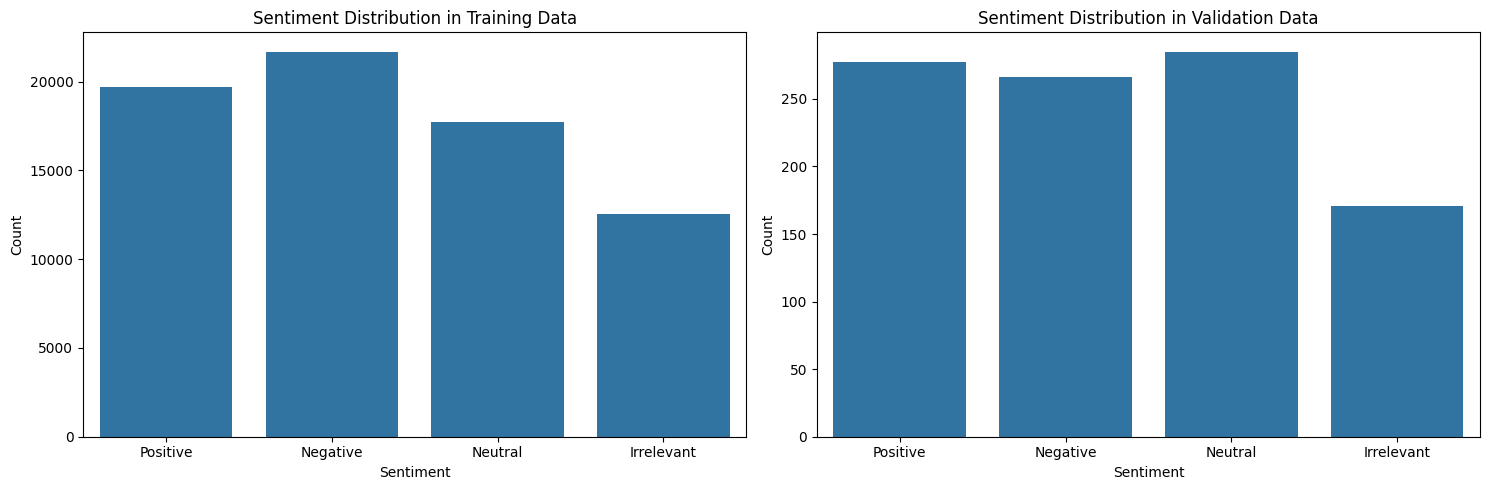

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(data=train_data_cleaned, x=train_data_cleaned.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[0])
ax[0].set_title('Sentiment Distribution in Training Data')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Sentiment')

sns.countplot(data=valid_data, x=valid_data.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[1])
ax[1].set_title('Sentiment Distribution in Validation Data')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Sentiment')

plt.tight_layout()
plt.show()

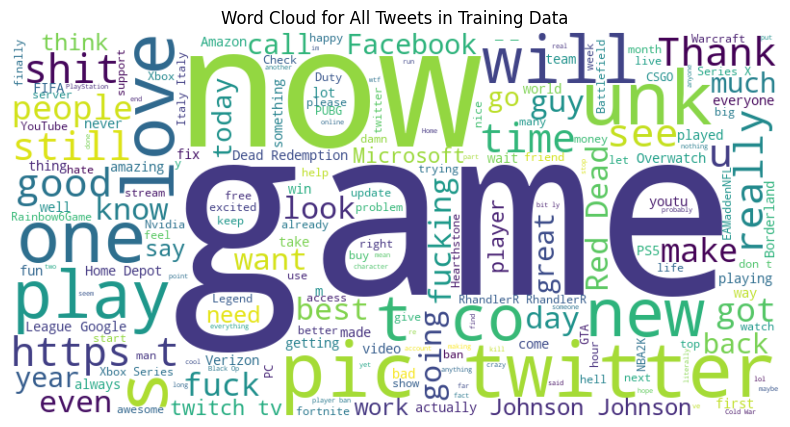

In [16]:
all_text = " ".join(tweet for tweet in train_data_cleaned[train_data_cleaned.columns[3]])
wordcloud_all = WordCloud(background_color='white', width=800, height=400).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Tweets in Training Data')
plt.show()

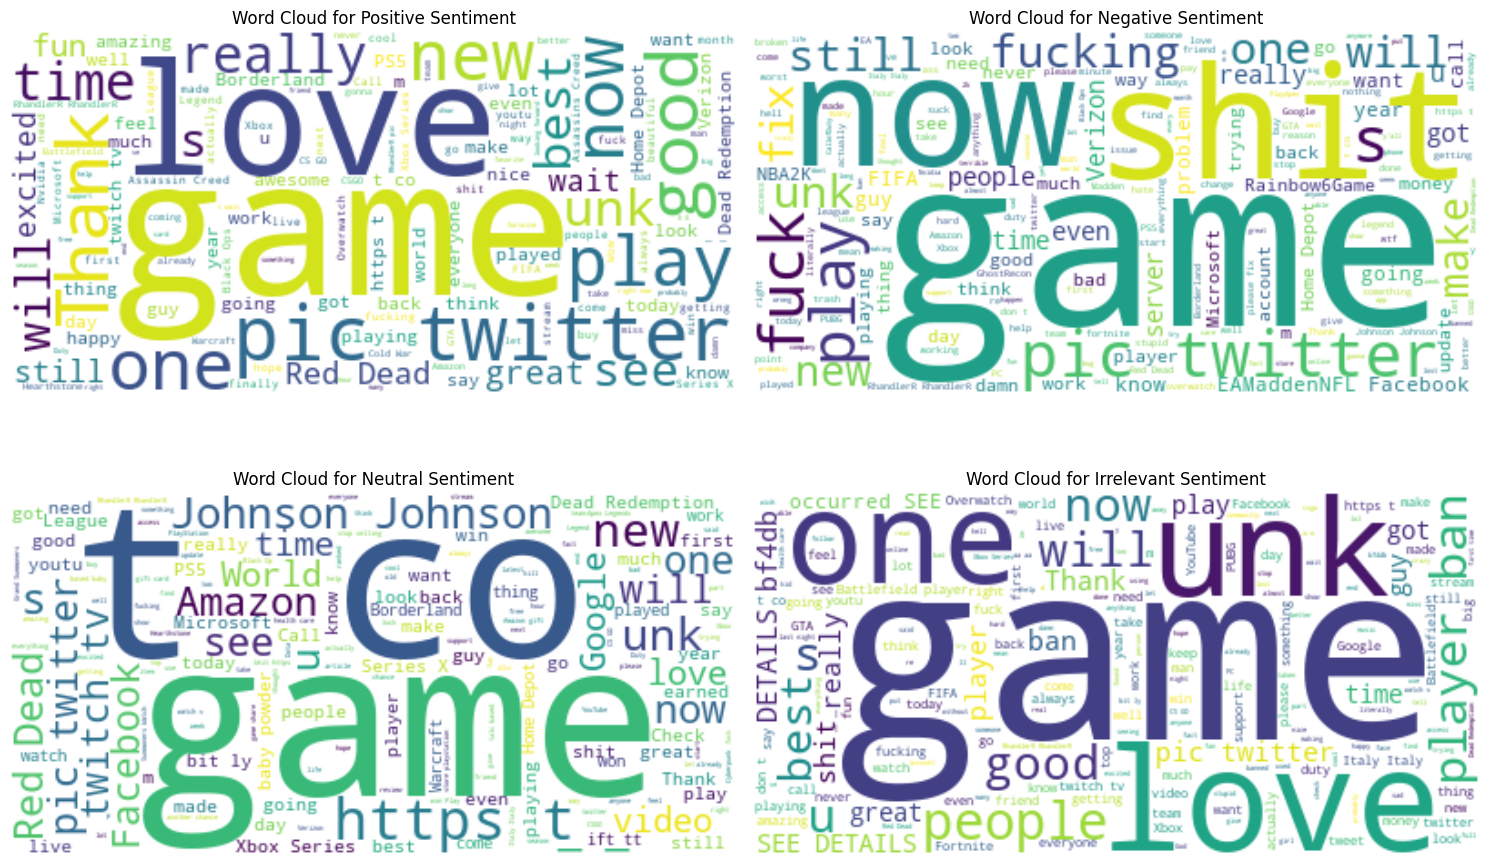

In [17]:
sentiments = ['Positive', 'Negative', 'Neutral', 'Irrelevant']

# Set up the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Generate and plot word clouds for each sentiment
for sentiment, ax in zip(sentiments, axs.ravel()):
    sentiment_text = " ".join(tweet for tweet in train_data_cleaned[train_data_cleaned[train_data_cleaned.columns[2]] == sentiment][train_data_cleaned.columns[3]])
    wordcloud_sentiment = WordCloud(background_color='white', width=400, height=200).generate(sentiment_text)
    
    ax.imshow(wordcloud_sentiment, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Word Cloud for {sentiment} Sentiment')

plt.tight_layout()
plt.show()

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# Alternative function to preprocess text without lemmatization or NLTK stopwords
def preprocess_text_simplified(text):
    # Convert to lowercase
    text = text.lower()
    # Simple tokenization using split (without relying on NLTK)
    tokens = text.split()
    # Remove special characters and numbers
    tokens = [token for token in tokens if token.isalpha()]
    return " ".join(tokens)

# Apply simplified preprocessing to training data
train_data_cleaned['processed_message_simplified'] = train_data_cleaned[train_data_cleaned.columns[3]].apply(preprocess_text_simplified)

# Extract most frequent terms using CountVectorizer with simplified preprocessing
vectorizer_simplified = CountVectorizer(max_features=20)
X_simplified = vectorizer_simplified.fit_transform(train_data_cleaned['processed_message_simplified'])
frequent_terms_simplified = vectorizer_simplified.get_feature_names_out()

frequent_terms_simplified

array(['and', 'but', 'for', 'game', 'have', 'in', 'is', 'it', 'just',
       'my', 'not', 'of', 'on', 'so', 'that', 'the', 'this', 'to', 'with',
       'you'], dtype=object)

In [33]:
# 2-gram을 추출하는 CountVectorizer
vectorizer_2gram = CountVectorizer(ngram_range=(2, 2), max_features=20)
X_2gram = vectorizer_2gram.fit_transform(train_data_cleaned['processed_message_simplified'])
frequent_2grams = vectorizer_2gram.get_feature_names_out()

frequent_2grams

array(['and the', 'at the', 'dead redemption', 'for the', 'if you',
       'in the', 'is the', 'johnson johnson', 'of the', 'on the',
       'red dead', 'the best', 'the game', 'this is', 'to be', 'to get',
       'to play', 'to see', 'to the', 'with the'], dtype=object)

In [34]:
vectorizer_3gram = CountVectorizer(ngram_range=(3, 3), max_features=20)
X_3gram = vectorizer_3gram.fit_transform(train_data_cleaned['processed_message_simplified'])
frequent_3grams = vectorizer_3gram.get_feature_names_out()

frequent_3grams

array(['access to health', 'at the same', 'black ops cold',
       'call of duty', 'do not have', 'for battlefield player',
       'has occurred see', 'have access to', 'league of legends',
       'most of them', 'not have access', 'of them do', 'one of the',
       'red dead redemption', 'rhandlerr rhandlerr rhandlerr',
       'thank you for', 'the fact that', 'the first time', 'them do not',
       'world of warcraft'], dtype=object)

In [22]:
# Adjusting the labels: Convert "Irrelevant" labels to "Neutral"
train_data_cleaned[train_data_cleaned.columns[2]] = train_data_cleaned[train_data_cleaned.columns[2]].replace('Irrelevant', 'Neutral')
valid_data[valid_data.columns[2]] = valid_data[valid_data.columns[2]].replace('Irrelevant', 'Neutral')

# Check the updated sentiment distribution in the training and validation data
updated_train_sentiment_distribution = train_data_cleaned[train_data_cleaned.columns[2]].value_counts()
updated_valid_sentiment_distribution = valid_data[valid_data.columns[2]].value_counts()

updated_train_sentiment_distribution, updated_valid_sentiment_distribution

(Positive
 Neutral     30245
 Negative    21698
 Positive    19712
 Name: count, dtype: int64,
 Irrelevant
 Neutral     456
 Positive    277
 Negative    266
 Name: count, dtype: int64)

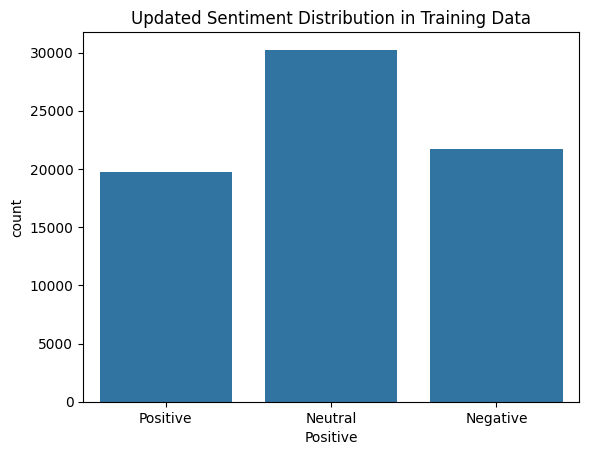

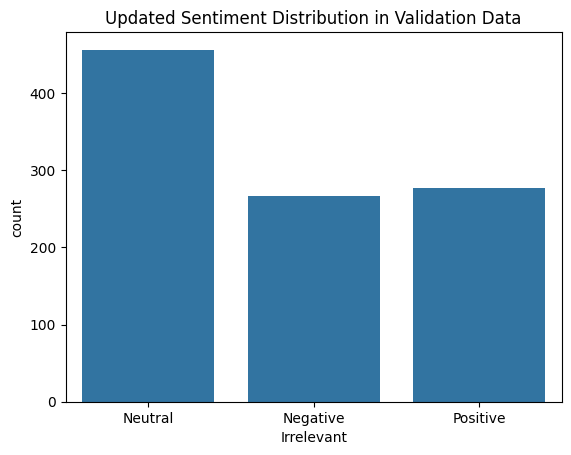

In [36]:
# Adjusting the labels: Convert "Irrelevant" labels to "Neutral"
train_data_cleaned.iloc[:, 2] = train_data_cleaned.iloc[:, 2].replace('Irrelevant', 'Neutral')
valid_data.iloc[:, 2] = valid_data.iloc[:, 2].replace('Irrelevant', 'Neutral')

# Check the updated sentiment distribution
updated_train_sentiment_distribution = train_data_cleaned.iloc[:, 2].value_counts()
updated_valid_sentiment_distribution = valid_data.iloc[:, 2].value_counts()

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=train_data_cleaned.columns[2], data=train_data_cleaned)
plt.title('Updated Sentiment Distribution in Training Data')
plt.show()

sns.countplot(x=valid_data.columns[2], data=valid_data)
plt.title('Updated Sentiment Distribution in Validation Data')
plt.show()

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features for computational efficiency

# Fit and transform the preprocessed text from the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data_cleaned['processed_message_simplified'])

# Apply simplified preprocessing to the validation data
valid_data['processed_message_simplified'] = valid_data[valid_data.columns[3]].apply(preprocess_text_simplified)

# Transform the preprocessed text from the validation data
X_valid_tfidf = tfidf_vectorizer.transform(valid_data['processed_message_simplified'])

# Extract target labels for training and validation
y_train = train_data_cleaned[train_data_cleaned.columns[2]]
y_valid = valid_data[valid_data.columns[2]]

X_train_tfidf.shape, X_valid_tfidf.shape

((71655, 5000), (999, 5000))

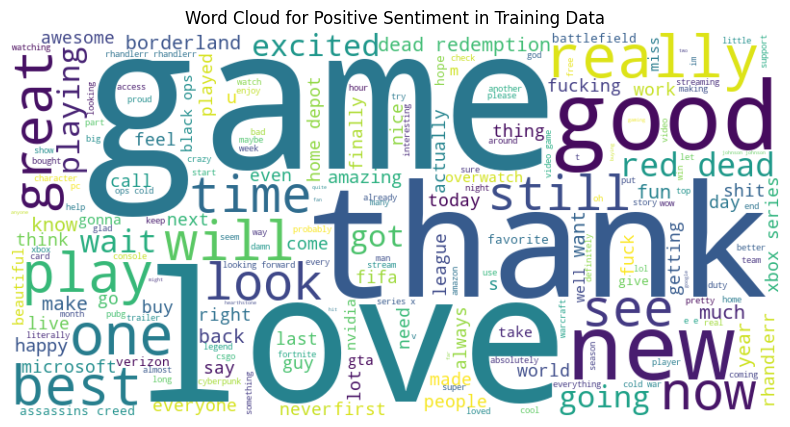

In [26]:
positive_text = " ".join(tweet for tweet in train_data_cleaned[train_data_cleaned[train_data_cleaned.columns[2]] == 'Positive']['processed_message_simplified'])

# Generate word cloud for Positive sentiment
wordcloud_positive = WordCloud(background_color='white', width=800, height=400).generate(positive_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment in Training Data')
plt.show()

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Define the target variable for training and validation again
y_train = train_data_cleaned[train_data_cleaned.columns[2]]
y_valid = valid_data[valid_data.columns[2]]

# Create the ML pipeline with TF-IDF vectorization and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', LogisticRegression(solver='sag', multi_class='auto', max_iter=10000))  # using 'sag' solver for faster convergence
])

# Train the pipeline model using the training data
pipeline.fit(train_data_cleaned['processed_message_simplified'], y_train)

# Validate the model's performance on the validation dataset
valid_accuracy = pipeline.score(valid_data['processed_message_simplified'], y_valid)

valid_accuracy

C:\Users\dubuj\anaconda3\envs\twitter\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.8048048048048048